In [0]:
import numpy as np
from scipy.optimize import linprog

def nn2na(NN):
    # Get every location where exist an arc:
    idxs = np.argwhere(NN)
    # Preallocate NA matrix, dimension is (nodes, arcs)
    NA = np.zeros([NN.shape[0], idxs.shape[0]]).astype(int)
    #C = np.zeros(NA.shape[1])
    # Loop in every arc, complete from (1) to (-1)
    for i, arc in enumerate(idxs):
        # Node arc:
        NA[arc[0], i] = 1 # From
        NA[arc[1], i] = -1 # To
    arc_idxs = [(arc[0], arc[1]) for arc in idxs]
    return NA, arc_idxs

# Shortest path Utils
def get_selected_arcs(arc_idxs, selected_arcs):
    arcs = []
    for index, value in enumerate(selected_arcs):
        if value > 0:
            arcs.append(arc_idxs[index])
    return arcs

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:19: OptimizeWarning: A_eq does not appear to be of full row rank. To improve performance, check the problem formulation for redundant equality constraints.


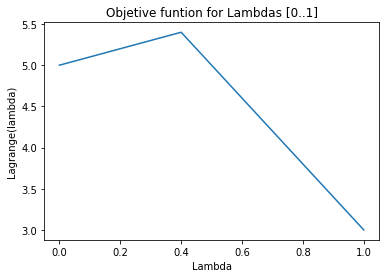

optimum lambda is 0.4


In [15]:
# IMPORT THE DATA:
NN = np.array([[0, 1, 1, 0, 0, 0],
               [0, 0, 0, 1, 0, 1],
               [0, 0, 0, 0, 1, 0],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 1],
               [0, 0, 0, 0, 0, 0]])
# DATA MANIPULATION:
dist = np.array([2, 1, 2, 5, 2, 1, 2])
time = np.array([[3, 1, 3, 1, 3, 3, 5]]) 
beq = np.array([1, 0, 0, 0, 0, -1])
NA, arc_idxs = nn2na(NN)
bounds = tuple([(0, None) for arcs in range(0, NA.shape[1])])
total_time = 8

lambd = np.arange(0, 1.05, 0.05)
lag_res = []
for i in range(len(lambd)):
    lag_dist = dist + time * lambd[i]
    res = linprog(lag_dist, A_eq=NA, b_eq=beq, bounds=bounds, method='simplex')
    lag_res.append(res.fun - lambd[i] * total_time)

max_lag = max(lag_res)
x = lag_res.index(max_lag)

import matplotlib.pyplot as plot
plot.title('Objetive funtion for Lambdas [0..1]')
plot.xlabel('Lambda')
plot.ylabel('Lagrange(lambda)')
plot.plot(lambd, lag_res)
plot.show()

print("optimum lambda is 0.4")